# 用户指南，第4章：列表，流(I)与输出
[原文链接](https://web.mit.edu/music21/doc/usersGuide/usersGuide_04_stream1.html)

在前两章中，介绍了音符`Note`对象，它包含音高`Pitch`和时值`Duration`。我们还以五线谱形式显示音符，并以midi形式播放。但是， unless you’re challenging Cage and Webern for the status of least musical material，你应该需要分析，处理或创建多个音符。

Python有多种手段处理多个对象，music21面向音乐地扩展了这些手段。我们先介绍Python的原生处理方式，再来介绍music21是如何扩展的。（如果你有python经验，可以直接跳过下面创建`note1`、`note2`、`note3`的段落）。

现在有两个音符，C4和F#4。我们来创建音符对象：

## 用Python列表处理多个对象

In [25]:
from music21 import *
note1 = note.Note("C4")
note2 = note.Note("F#4")

通过修改`duration`，将第一个音符改为半音符（音符默认为四分音符）

In [26]:
note1.duration.type = 'half'
note1.duration.quarterLength

2.0

In [27]:
note2.duration.quarterLength

1.0

为了输出每个音符的`step`（没有八度与变调符号信息的音名），你可以：

In [28]:
print(note1.step)

C


In [29]:
print(note2.step)

F


但是如果你有30个音符怎么办？一遍遍输入`print(noteX.step)`很麻烦。幸运的是，我们可以把音符存入一个列表`list`，它是Python内置的一种对象，用来存储多个其他对象（例如音符、和弦，或者数值）。在方括号`[]`中，将你要存储的对象用逗号分隔开，以创建列表。我们来创建一个叫`noteList`的列表，包含`note1`和`note2`

In [30]:
noteList = [note1, note2]

使用print来检查`noteList`包含我们的音符

In [31]:
print(noteList)

[<music21.note.Note C>, <music21.note.Note F#>]


现在我们可以写一个两行的程序来输出列表中的所有音符。大多数现代编程语言都有一种方法对列表中的所有元素进行操作。在python中，它是`for`。输入以下代码时，请一定要输入第二行开头的空格（如果在命令行中输入，则你需要按两次回车来运行）

In [32]:
for thisNote in noteList:
    print(thisNote.step)

C
F


以上代码是如何运行的？`for thisNote in noteList:`表示按顺序取出`noteList`中的每个元素，并临时地称为`thisNote`。然后，冒号`:`表示以下的一些代码会对`noteList`的每个元素执行。那么python怎么知道哪些代码属于这个范畴？简单：循环内的每一行开头必须用空格缩进。（我通常用四个空格或tab键。有些人用两个空格。只要一致就好）

这里的循环不节省多少时间，但如果有几十个，甚至几百个音符要处理？那么对每个对象进行操作的能力越来越重要了。

向noteList加入另一个音符。创建一个`B-2`

In [33]:
note3 = note.Note("B-2")

然后添加到`noteList`的末尾

In [34]:
noteList.append(note3)

列表在运行中可以改变，称为“可变的”（mutable）对象（我们后面会学到不可变对象）。

通过`len()`函数，我们可以看到`noteList`的长度是3

In [35]:
len(noteList)

3

再次运行循环，我们会看到第三个音符

In [36]:
for thisNote in noteList:
    print(thisNote.step)

C
F
B


输出第一个音符：

In [37]:
noteList[0]

<music21.note.Note C>

注意在列表中，第一个元素是`[0]`，而不是`[1]`。这是各种历史原因造成的，即计算机计算以0开头的列表比以1开头的列表更快，有点别扭，但是我们必须适应。想象一下，欧洲和美国的楼层计法。

> 译注：其实以[0]开头方便多了，例如等差数列第n项的值为：初项+公差*(n-1)，20世纪是19xx年，如果以0开头都能省事一些。班上有50个人，要根据学号排成6列。如果学号、行号和列号都以0开头，则26号的位置就是26//6=4行，26%6=2列，计算起来更简单。
>
> 手动狗头@[musicpy](https://github.com/Rainbow-Dreamer/musicpy/wiki/Data-structures-of-musicpy-%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84)，它不Pythonic。

继续前往下一个音符，即第二个音符：

In [38]:
noteList[1]

<music21.note.Note F#>

通过`index()`函数，向`noteList`询问`note2`在哪里

In [39]:
noteList.index(note2)

1

获取最后一个元素：

In [40]:
noteList[-1]

<music21.note.Note B->

这是欧洲对地下室的楼层计法。这和noteList[2]是同一个元素。我们可以验证：

In [41]:
noteList[-1] is noteList[2]

True

Python列表在编程中是一个重要的工具，但是Python列表对音乐一无所知。为了给我们的音乐带来智能，我们需要使用music21中的列表：流`Stream`

## 流`Stream`简介

`Stream`和它的衍生类（总谱`Score`、音轨`Part`、小节`Measure`）是music21中的基本容器，存储`Note`、`Chord`、`Clef`和`TimeSignature`等各种music21对象。

`Stream`中的对象是在时间中分布的。每个对象有一个offset表示它距离`Stream`的开头有多少个四分音符。例如，在一个4/4小节中有两个二分音符，第一个音符的offset是0.0，第二个音符的offset是2.0。

进一步地，`Stream`也可以存储别的`Stream`，以实现嵌套的、时间顺序的结构。存储的`Stream`也有offset。例如，将两个4/4的`Measure`对象存入一个`Part`中，第一个`Measure`的offset是0.0，第二个`Measure`的offset是4.0。

常用的`Stream`衍生类包括总谱`Score`、音轨`Part`和小节`Measure`。任何时候，需要将一群music21对象放到一起时，我们都会把它放入一个`Stream`。`Stream`也能用于没有那么按常理组织的结构（conventional organizational structures）。我们会经常创建与处理临时的`Stream`，因为`Stream`提供了大量用于解包和处理批量对象的有效工具。例如，如果你要提取所有位于当前小节第2拍的音符，你会想把它们存入`Stream`。

与其他音乐分析框架相比，music21设计上的一大特色是：一个music21可以同时属于多个`Stream`（或者说，被多个`Stream`引用）。例如，一个`Part`中有多个`Measure`。如果提取出`Part`的一个区间（使用`measures()`函数），则得到一个新的`Stream`，包含我们想要的小节。这一过程中，我们没有创建新的音符对象，而是仅仅在新的`Stream`中引用这些音符。在输出的`Stream`中对音符进行的操作会同时在原来的`Part`中发生。当然有一个限制：相同的对象不能在一个`Stream`的树结构中出现两次。例如，你不能把一个音符同时存入同一个乐谱的第3小节和第5小节，但可以同时存入一个乐谱的第3小节和另一个乐谱的第5小节。（例如，如果你想在原版的乐谱和改编版的乐谱中跟踪这个音符）。大多数用户无需担心这些细节，只需要知道这个特性让music21能够实现其他软件实现不了的功能。

## 创建简单的`Stream`
`Stream`中存放的对象叫做“元素”，必须是一种`Music21Object`（不用担心，music21中几乎所有对象都是`Music21Object`，例如音符`Note`，和弦`Chord`、拍号`TimeSignature`等等）

（如果想把不是`Music21Object`的对象加入`Stream`，请使用[`ElementWrapper`](https://web.mit.edu/music21/doc/moduleReference/moduleBase.html#music21.base.ElementWrapper)）

`Stream`和列表都能按顺序存储独立的元素。这一点上来说它们是相似的。但不同之处是：`Stream`只能存储music21对象，但`Stream`更强大更智能。

要创建一个`Stream`，只需输入`stream.Stream()`，然后用等号赋值给一个变量。我们叫它`stream1`

In [42]:
stream1 = stream.Stream()

注意：就像对象`Note`（大写）属于模块`note`（小写），对象`Stream`（大写）属于模块`stream`（小写）。变量名，例如`stream1`既可以是大写，也可以是小写（或者驼峰格式，例如我们刚才的`noteList`）

`Stream`的主要用法是存储音符。我们把刚才的三个`Note`存入`stream1`，使用`append`方法。

In [43]:
stream1.append(note1)
stream1.append(note2)
stream1.append(note3)

当然，这对于几百个音符来说会很麻烦，所以我们也可以用`repeatAppend()`方法来加入同一个音符的大量独立副本。该函数通过python的`copy.deepcopy`创建独立副本，而不是同一个对象的多次引用。

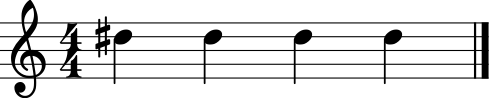

In [44]:
stream2 = stream.Stream()
n3 = note.Note('D#5')  # 创建Note对象时可以输入八度号
stream2.repeatAppend(n3, 4)
stream2.show()

回到第一个stream。用`len`来查看它含有的对象数量

In [45]:
len(stream1)

3

还可以用`Show()`函数查看Stream的内容及其offset（这里，offset从0.0开始，因为我们是在新建空`Stream`中加入对象）

In [46]:
stream1.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


如果你已经正确配置了环境，则`show`函数将会打开Finale，Sibelius，或者MuseScore并显示音符

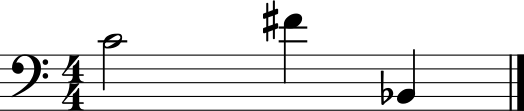

In [47]:
stream1.show()

## 访问`Stream`
获取每个音符的初始音名：

In [48]:
for thisNote in stream1:
    print(thisNote.step)

C
F
B


如同python列表一样，用`[X]`来访问`Stream`元素

In [49]:
stream1[0]

<music21.note.Note C>

In [50]:
stream1[-1].nameWithOctave

'B-2'

虽然`Stream`不具有Python列表的所有功能，但实现了一些常用的高级功能。用`index()`获取对象在`Stream`中的位置

In [51]:
note3Index = stream1.index(note3)
note3Index

2

用`pop()`删除指定位置的元素

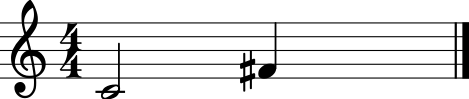

In [52]:
stream1.pop(note3Index)
stream1.show()

把刚才删除的`note3`加回来

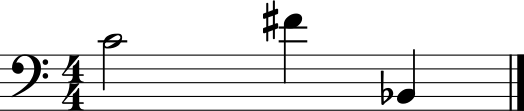

In [53]:
stream1.append(note3)
stream1.show()

## 用`getElementByClass()`获取指定类型元素
todo

In [54]:
for thisNote in stream1.getElementsByClass(note.Note):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


todo

In [55]:
for thisNote in stream1.getElementsByClass(['Note', 'Rest']):
    print(thisNote, thisNote.offset)

<music21.note.Note C> 0.0
<music21.note.Note F#> 2.0
<music21.note.Note B-> 3.0


todo

In [56]:
for thisNote in stream1.notes:
    print(thisNote)

<music21.note.Note C>
<music21.note.Note F#>
<music21.note.Note B->


todo

In [57]:
listOut = stream1.pitches
listOut

[<music21.pitch.Pitch C4>,
 <music21.pitch.Pitch F#4>,
 <music21.pitch.Pitch B-2>]

todo

In [58]:
sOut = stream1.getElementsByClass(note.Note)
sOut.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


todo

In [59]:
sOut = stream1.getElementsByClass(note.Note).stream()  # <-- different
sOut.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


## 用`getElementByOffset()`获取指定时间的元素
todo

In [60]:
sOut = stream1.getElementsByOffset(3)
len(sOut)

1

In [61]:
sOut[0]

<music21.note.Note B->

todo

In [62]:
sOut = stream1.getElementsByOffset(2, 3).stream()
sOut.show('text')

{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


todo
## 更多的`Stream`特性
todo

In [63]:
stream1.analyze('ambitus')

<music21.interval.Interval A12>

todo

In [64]:
note1.offset

0.0

todo

In [65]:
note2.offset

2.0

todo

In [66]:
note3.offset

3.0

todo

In [67]:
for thisNote in stream1:
    print(thisNote.offset, thisNote.name)

0.0 C
2.0 F#
3.0 B-


todo

In [68]:
note2.offset

2.0

In [69]:
note2.getOffsetBySite(stream1)

2.0

todo

In [70]:
stream1.lowestOffset

0.0

`Stream`还能做什么呢？就像`Note`一样，使用`Show()`函数，我们可以用不同方式显示`Stream`。用MIDI播放这些音符：

In [71]:
stream1.show('midi')

或者以五线谱形式显示

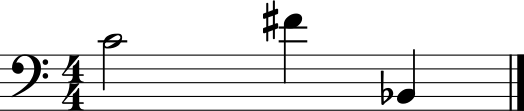

In [72]:
stream1.show()

你可能要问，为什么是4/4拍？因为这是新建对象的默认节拍，在`defaults`模块中可以看到

In [73]:
defaults.meterNumerator

4

In [74]:
defaults.meterDenominator

'quarter'

todo

In [75]:
stream1.show('text')

{0.0} <music21.note.Note C>
{2.0} <music21.note.Note F#>
{3.0} <music21.note.Note B->


todo

In [76]:
note1

<music21.note.Note C>

todo

In [77]:
stream1

<music21.stream.Stream 0x188528f2f40>

todo

In [78]:
stream1.id = 'some_notes'
stream1

<music21.stream.Stream some_notes>

todo

In [79]:
note1.id = 'my_favorite_C'
note1

<music21.note.Note C>

todo

In [81]:
stream1.duration

<music21.duration.Duration 4.0>

In [82]:
stream1.duration.type

'whole'

In [83]:
stream1.duration.quarterLength

4.0

todo

In [84]:
stream1.highestTime

4.0

## 嵌套`Stream`
todo

In [85]:
biggerStream = stream.Stream()
note2 = note.Note("D#5")
biggerStream.insert(0, note2)

todo

In [86]:
biggerStream.append(stream1)

todo

In [87]:
biggerStream.show('text')

{0.0} <music21.note.Note D#>
{1.0} <music21.stream.Stream some_notes>
    {0.0} <music21.note.Note C>
    {2.0} <music21.note.Note F#>
    {3.0} <music21.note.Note B->


todo

In [88]:
note1 in stream1

True

In [89]:
note1 in biggerStream

False

todo